In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/Social_Network_Ads.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

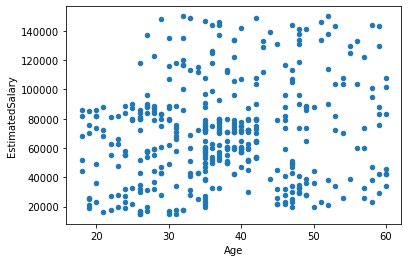

In [4]:
X = df[['Age','EstimatedSalary']].copy()
X.plot.scatter(x='Age',y='EstimatedSalary')

In [5]:
from sklearn.cluster import KMeans

c:\Users\ZAID\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ZAID\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ZAID\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ZAID\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

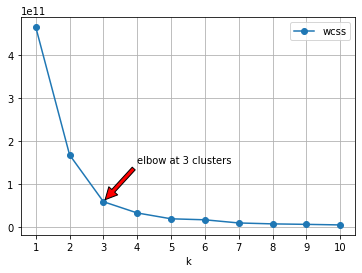

In [6]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, n_init='auto')
    model.fit(X)
    wcss.append({
        'k':i,
        'wcss':model.inertia_
    })
wcss_df = pd.DataFrame(wcss)
wcss_df.plot(x='k', y='wcss', 
             xticks=wcss_df['k'], grid=True, marker='o')
plt.annotate('elbow at 3 clusters', xy=(3, 0.6e11), xytext=(4, 1.5e11),
            arrowprops={'facecolor':'red', 'shrink':0.05})  
plt.show()

In [7]:
model = KMeans(n_clusters=3, n_init='auto')
model.fit(X)

c:\Users\ZAID\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [8]:
X['group'] = model.predict(X)
X

,Age,EstimatedSalary,group
0,19,19000,2
1,35,20000,2
2,26,43000,2
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,2
396,51,23000,2
397,50,20000,2
398,36,33000,2


c:\Users\ZAID\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZAID\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZAID\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


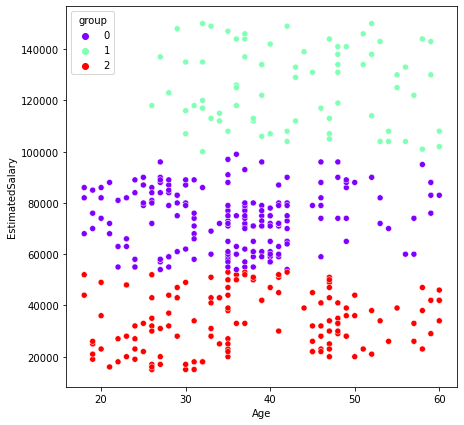

In [9]:
# visualize the clusters
import seaborn as sns

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=X, x='Age', y='EstimatedSalary', 
                hue='group', ax=ax, palette='rainbow')
plt.show()

In [10]:
single_input_df = pd.DataFrame({
    'Age':[30],
    'EstimatedSalary':[17000]
})
model.predict(single_input_df)

array([2])